In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('default')

## Capacity 1

In [66]:
df = pd.read_csv('./drone_performance_on_obstacles.csv')

df.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,distance_after_obstacle_avoidance
0,20,1,5,150.634669,151.273962
1,20,1,5,176.628817,177.912114
2,20,1,5,140.567078,145.911450
3,20,1,5,164.640221,166.709540
4,20,1,5,140.497700,140.547606


In [68]:
print("Average distance with no obstacle \t\t\t\t:", df[df['drone_capacity']==1]['obstacle_free_distance'].mean())
print("Average distance with obstacle avoidance \t\t\t:",df[df['drone_capacity']==1]['distance_after_obstacle_avoidance'].mean())

Average distance with no obstacle 				: 309.0047237379165
Average distance with obstacle avoidance 			: 311.75638998623384


In [69]:
df_cap_1 = df[df['drone_capacity']==1]

df_cap_1.tail()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,distance_after_obstacle_avoidance
47,60,1,5,431.285982,435.345888
48,60,1,5,446.910325,448.312568
49,60,1,5,542.188809,544.420073
50,60,1,5,483.610577,487.130481
51,60,1,5,473.604621,477.329540


In [70]:
df_cap_1['rho_obstacle_free'] = df_cap_1['obstacle_free_distance']/df_cap_1['obstacle_free_distance']
df_cap_1['eho_distance_after_obstacle_avoidance'] = df_cap_1['distance_after_obstacle_avoidance']/df_cap_1['obstacle_free_distance']

df_cap_1.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,distance_after_obstacle_avoidance,rho_obstacle_free,eho_distance_after_obstacle_avoidance
0,20,1,5,150.634669,151.273962,1.0,1.004244
1,20,1,5,176.628817,177.912114,1.0,1.007265
2,20,1,5,140.567078,145.911450,1.0,1.038020
3,20,1,5,164.640221,166.709540,1.0,1.012569
4,20,1,5,140.497700,140.547606,1.0,1.000355


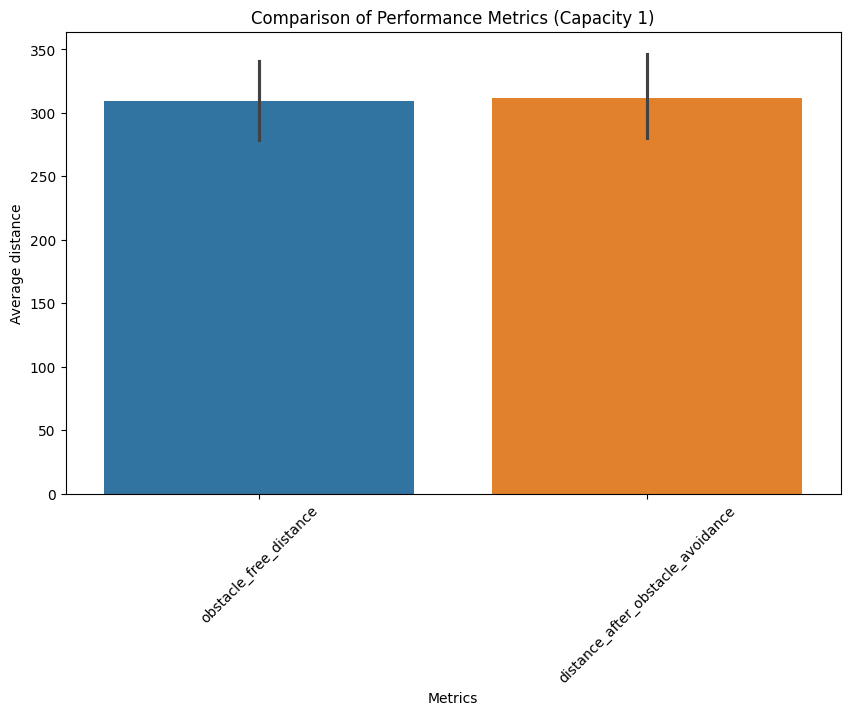

In [73]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cap_1.iloc[:, -4:-2])
plt.title('Comparison of Performance Metrics (Capacity 1)')
plt.xlabel('Metrics')
plt.ylabel('Average distance')
plt.xticks(ticks=[0, 1], labels=['obstacle_free_distance', 'distance_after_obstacle_avoidance'], rotation=45)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


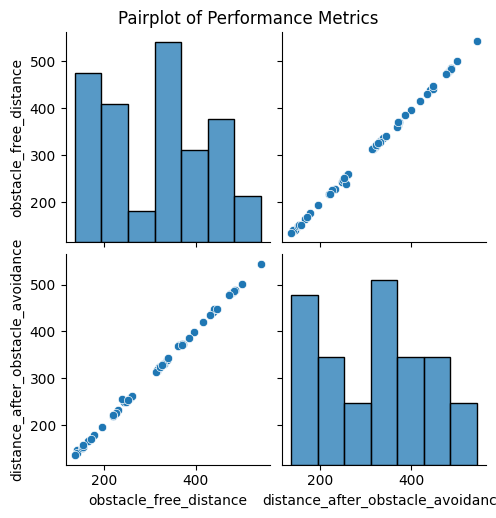

In [74]:
# Pairplot
sns.pairplot(df_cap_1.iloc[:, -4:-2])
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

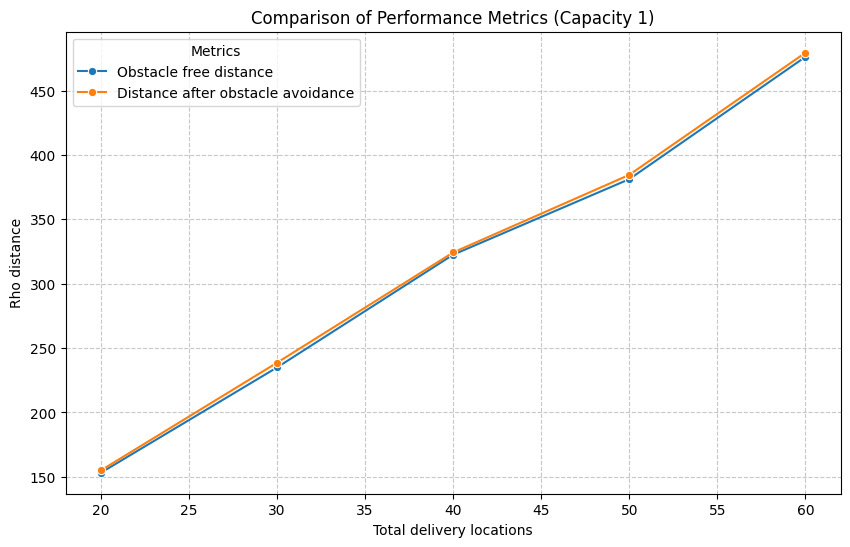

In [79]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_1, x='delivary_locations', y='obstacle_free_distance', label='Obstacle free distance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_1, x='delivary_locations', y='distance_after_obstacle_avoidance', label='Distance after obstacle avoidance', marker='o', errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity 1)')
plt.xlabel('Total delivery locations')
plt.ylabel('Rho distance')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

## Capacity K

In [ ]:
df_cap_k = pd.read_csv('./drone_performance_on_obstacle_capacity_k.csv')

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,greedy_distance,christofides_distance
0,25,5,13,76.938505,85.712216,82.209207
1,25,5,13,75.209227,82.648294,79.161673
2,25,5,13,67.989373,76.599275,74.458829
3,25,5,13,82.060355,95.783066,91.010909
4,25,5,13,76.028111,77.196335,78.973533


In [ ]:
df_cap_k['rho_greedy'] = df_cap_k['greedy_distance']/df_cap_k['obstacle_free_distance']
df_cap_k['rho_christofides'] = df_cap_k['christofides_distance']/df_cap_k['obstacle_free_distance']

df_cap_k.head()

,delivary_locations,drone_capacity,obstacles,obstacle_free_distance,greedy_distance,christofides_distance,rho_greedy,rho_christofides
0,25,5,13,76.938505,85.712216,82.209207,1.114035,1.068505
1,25,5,13,75.209227,82.648294,79.161673,1.098912,1.052553
2,25,5,13,67.989373,76.599275,74.458829,1.126636,1.095154
3,25,5,13,82.060355,95.783066,91.010909,1.167227,1.109073
4,25,5,13,76.028111,77.196335,78.973533,1.015366,1.038741


In [ ]:
print("Average distance with no obstacle \t\t\t\t:", df_cap_k['obstacle_free_distance'].mean())
print("Average distance with greedy technique \t\t\t\t:",df_cap_k['greedy_distance'].mean())
print("Average distance with christofides technique \t\t\t:",df_cap_k['christofides_distance'].mean())

Average distance with no obstacle 				: 91.10915665247396
Average distance with greedy technique 				: 97.8713244240082
Average distance with christofides technique 			: 96.31074360132608


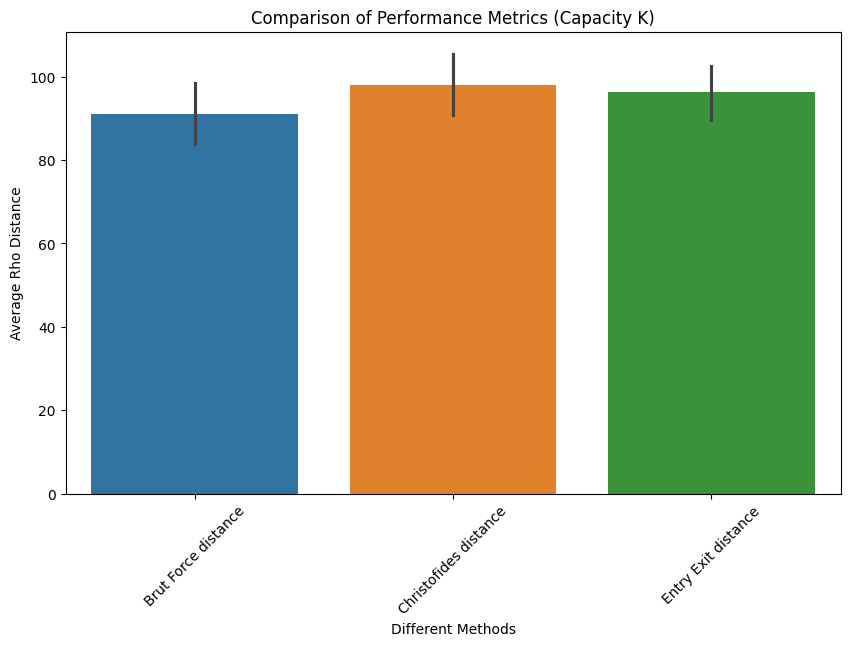

In [ ]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cap_k.iloc[:, -5:-2], estimator='mean')
plt.title('Comparison of Performance Metrics (Capacity K)')
plt.xlabel('Different Methods')
plt.ylabel('Average Rho Distance')
plt.xticks(ticks=[0,1,2], labels=['Brut Force distance','Christofides distance','Entry Exit distance'], rotation=45)
plt.show()

c:\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


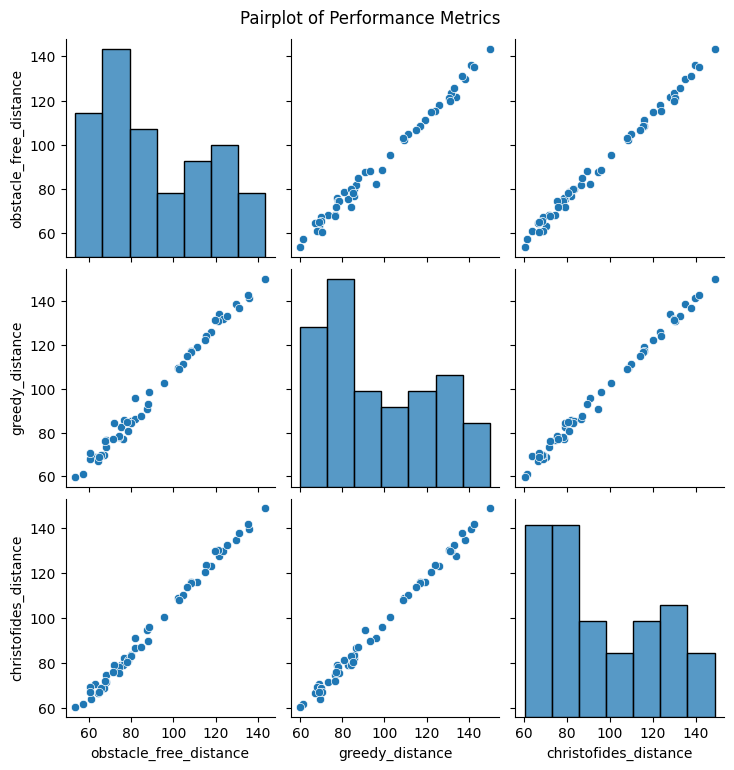

In [ ]:
# Pairplot
sns.pairplot(df_cap_k.iloc[:, -5:-2])
plt.suptitle('Pairplot of Performance Metrics', y=1.02)
plt.show()

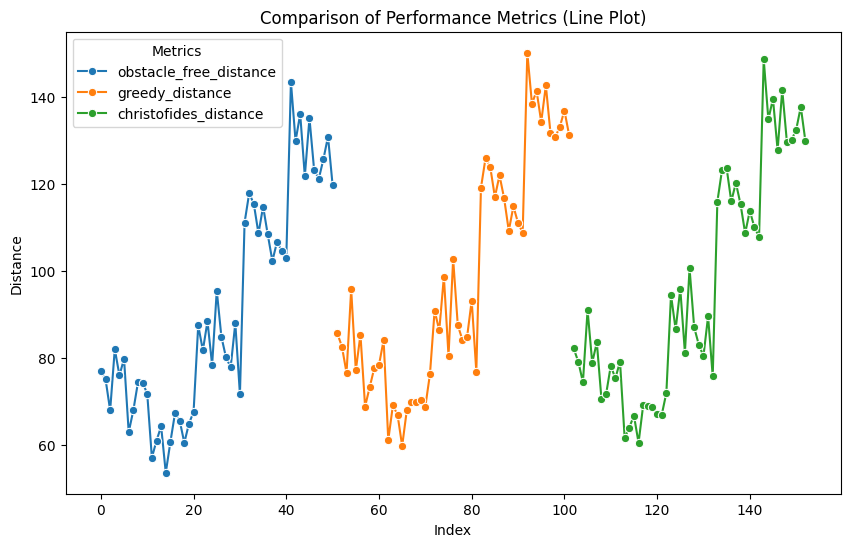

In [ ]:
melted_df = df_cap_k.melt(value_vars=['obstacle_free_distance', 'greedy_distance', 'christofides_distance'],
                     var_name='Metrics', value_name='Distance')

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=melted_df, x=melted_df.index, y='Distance', hue='Metrics', marker='o')
plt.title('Comparison of Performance Metrics (Line Plot)')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.legend(title='Metrics')
plt.show()

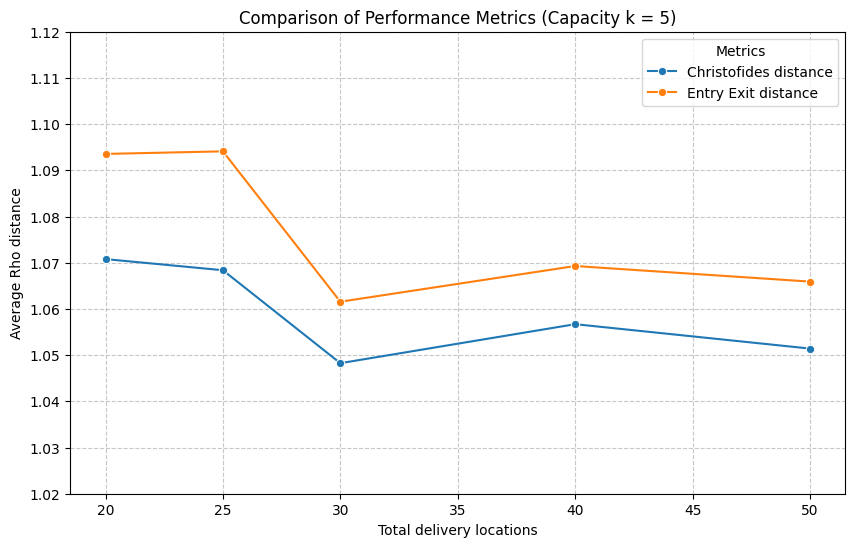

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_k, x='delivary_locations', y='rho_christofides', label='Christofides distance', marker='o', errorbar=None)
sns.lineplot(data=df_cap_k, x='delivary_locations', y='rho_greedy', label='Entry Exit distance', marker='o', errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity k = 5)')
plt.xlabel('Total delivery locations')
plt.ylabel('Average Rho distance')
plt.legend(title='Metrics')

plt.yticks(np.arange(1.02, 1.12, step=0.01))
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

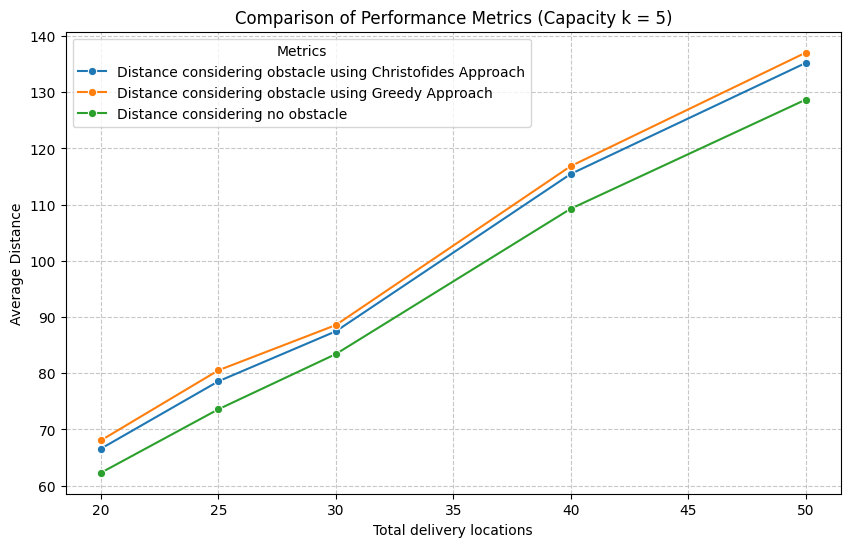

In [ ]:
plt.figure(figsize=(10, 6))

# Plotting each line individually
sns.lineplot(data=df_cap_k, x='delivary_locations', y='christofides_distance', label='Distance considering obstacle using Christofides Approach',marker='o',errorbar=None)
sns.lineplot(data=df_cap_k, x='delivary_locations', y='greedy_distance', label='Distance considering obstacle using Greedy Approach', marker='o',errorbar=None)
sns.lineplot(data=df_cap_k, x='delivary_locations', y='obstacle_free_distance', label='Distance considering no obstacle', marker='o',errorbar=None)

plt.title('Comparison of Performance Metrics (Capacity k = 5)')
plt.xlabel('Total delivery locations')
plt.ylabel('Average Distance')
plt.legend(title='Metrics')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

In [ ]:
# plt.xticks(sorted(list(df_cap_k["delivary_locations"].unique())))